# Medidas de riesgo

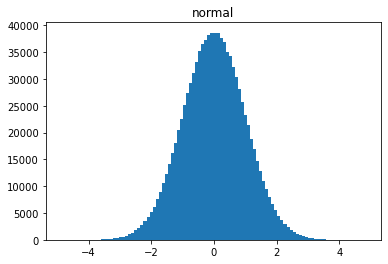

Distibución: NORMAL
mean: 0.00041850824096949983
std : 1.0005083229735299
skewness : -0.0010490215174099222
kurtosis : 0.0017892819313662933
VaR 95% : -1.6437707226824898
Jarque-Bera : 0.31680476691124815
p_value : 0.8535062760578118
is normal :True


In [14]:
# !/usr/bin/ python
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import scipy
import importlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import skew, kurtosis, chi2


def normality_test(x_size, type_random_variable, degrees_freedom=5):
    """Create a normality test by example with Jarque_Bera
    Arg:
        1. x_size : size of distribution.
        2. type_random_variable : generate random distributions.
        3. degrees_freedom : only for t-student
    Return:
        Plot and risk metrics
    """
    if type_random_variable == "normal":
        x = np.random.standard_normal(x_size)
        x_str = type_random_variable
    elif type_random_variable == "exponential":
        x = np.random.standard_exponential(x_size)
        x_str = type_random_variable
    elif type_random_variable == "student":
        x = np.random.standard_t(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"
    elif type_random_variable == "chi-squared":
        x = np.random.chisquare(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"

    # compute risk metrics
    x_mean = np.mean(x)
    x_stdev = np.std(x)
    x_skew = skew(x)
    x_kurt = kurtosis(x)
    x_var_95 = np.percentile(x, 5)
    jb = x_size/6 * (x_skew**2 + 1/4*(x_kurt**2))
    p_value = 1 - chi2.cdf(jb, df=2) # buscamos dos grados de libertad
    is_normal = (p_value > 0.05) # equivalenty jb < 6

    # plot histogram
    plt.figure()
    plt.hist(x, bins=100)
    plt.title(type_random_variable)
    plt.show()

    # print risk metrics
    print("Distibución: " + x_str.upper())
    print("mean: " + str(x_mean))
    print("std : " + str(x_stdev))
    print("skewness : " + str(x_skew))
    print("kurtosis : " + str(x_kurt))
    print("VaR 95% : " + str(x_var_95))
    print("Jarque-Bera : " + str(jb))
    print("p_value : " + str(p_value))
    print("is normal :" + str(is_normal))


if __name__ == "__main__":

    normality_test(10**6, "normal")

> Tengo un valor Jarque-Bera de 0.31 lo que significa que estoy en el eje de las x en 0.70
>
> Calculado el p-value que es la provabilidad de tener eventos que sean mayores a 0.31 y esa área de probabilidad bajo la curva que es hacia la derecha a partir de 0.31 es del 0.85

**PLAYING WITH Borel_Cantelli**  
Voy a crear un loop infinito con distribuciones normales hasya que uno de ellos no paso el test de normalidad:

In [17]:
def normality_test(x_size, type_random_variable, degrees_freedom=5):
    """Create a normality test e.g Jarque_bera
    Arg:
        1. x_size : size of distribution.
        2. type_random_variable : generate random distributions.
        3. degrees_freedom : only for t-student
    Return:
    """

    is_normal = True
    counter = 0
    while is_normal:
        
        if type_random_variable == "normal":
            x = np.random.standard_normal(x_size)
            x_str = type_random_variable
        elif type_random_variable == "exponential":
            x = np.random.standard_exponential(x_size)
            x_str = type_random_variable
        elif type_random_variable == "student":
            x = np.random.standard_t(size=x_size, df=degrees_freedom)
            x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"
        elif type_random_variable == "chi-squared":
            x = np.random.chisquare(size=x_size, df=degrees_freedom)
            x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"

        # compute risk metrics
        x_mean = np.mean(x)
        x_stdev = np.std(x)
        x_skew = skew(x)
        x_kurt = kurtosis(x)
        x_var_95 = np.percentile(x, 5)
        jb = x_size/6 * (x_skew**2 + 1/4*(x_kurt**2))
        p_value = 1 - chi2.cdf(jb, df=2) # buscamos dos grados de libertad
        is_normal = (p_value > 0.05) # equivalenty jb < 6

        # plot histogram
        plt.figure()
        plt.hist(x, bins=100)
        plt.title(type_random_variable)
        plt.show()
        
        print("counter :" + str(counter))
        print("------------")

        # print risk metrics
        print("Distibución: " + x_str.upper())
        print("mean: " + str(x_mean))
        print("std : " + str(x_stdev))
        print("skewness : " + str(x_skew))
        print("kurtosis : " + str(x_kurt))
        print("VaR 95% : " + str(x_var_95))
        print("Jarque-Bera : " + str(jb))
        print("p_value : " + str(p_value))
        print("is normal :" + str(is_normal))
        
        counter += 1

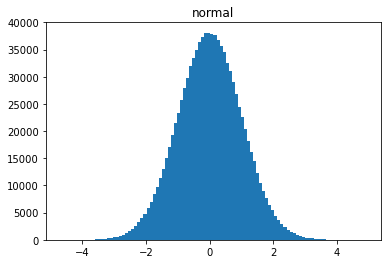

counter :0
------------
Distibución: NORMAL
mean: 0.0006919579798533419
std : 0.9999873969993277
skewness : 0.004594263312789796
kurtosis : 0.004701745384343425
VaR 95% : -1.6449213177054778
Jarque-Bera : 4.4389763003408245
p_value : 0.10866471460849314
is normal :True


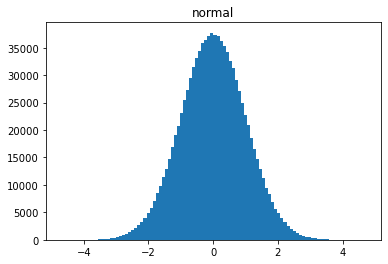

counter :1
------------
Distibución: NORMAL
mean: 0.0015414672537610635
std : 1.0003858971545334
skewness : -0.007717332942213212
kurtosis : -0.0020991732091419912
VaR 95% : -1.6460648176165773
Jarque-Bera : 10.109809963577352
p_value : 0.006377972757104722
is normal :False


In [25]:
normality_test(10**6, "normal")

---

Al segundo test ha fallado, veamos que tenemos:
* p_value : 0.006377972757104722  

es decir que si estoy jugando con un nivel de confianza del 95% con este p-value estoy < 0.05 y por lo tanto no es una distribución normal.

**VAMOS A BUSCAR LAS MÉTRICAS DE RIESGO**


Un **déficit esperado** es una idea que se utiliza comúnmente dentro del proceso de gestión del riesgo financiero para determinar la cantidad de riesgo asociado con una cartera financiera tal como está constituida actualmente.


In [ ]:
x_cvar_95 = who knows?

**Two-sided confidence intervals**

<img src="img/02.png">


**VALUE at RISK**  

The Value at Risk of level $q \in (0,1)$ is a number $VaR(p)$ such that

$$
P[x \ge VaR(q)] = p
$$

Equivalenty, 

$$
P[x \leq VaR(q)] = 1 - p
$$

For noraml random variables $N(\mu, \sigma^2)$ we have

$$
VaR(95\%) = \mu - 1.64 * \sigma
$$

![](img/03.png)

**Visto desde un punto de vista financiero**  
En un mes que tiene 20 días hábiles de trading ¿cuál es el peor día que puedo tener en un mes? Pues tomamos el pero día en un mes y ese es el $VaR(95\%)$.  
Obviamente si lo hacemos por varios mesos o hasta ños, nos va a decir cuáles son las peores pérdidas que vamos a tener con ese 95%.

**A mi lo que me interesan son las ganancias**   
Entonces digo, qué es lo peor que me puede ir en el 95% de mis casos. Yo se que tengo mis ganacias a la derecha en un 95% y ese 5% de perdidas están a la izquierda.

Esencialmente lo que estoy haciendo es: tomo mi distribución, le calculo el cuantil al 5% y ese es mi valor en riesgo al 95%.
>
>Obviamente ésto sólo palica cuando la distribución es de rendimientos, entonces me va a dar ¿cuál es el rendimiento tal que el 95% de probabilidad, mis rendimientos van a ser mayores que dicho número? O visto en dinero ¿Cuál es la perdida máxima que yo puedo tener en el 95% de los casos? Básicamente separo la zona gris y la tiro a la basura, luego miro el número más pequeño y ese es el **Valos en Riesgo**.
 

**¿QUE ES EL CVaR ?**  
Es el promedio de todo lo que está hacia la izquierda (la zona gris)

Imagínate una distribución de 100 puntos que sean 

caso1 :

$[-\infty , -\infty , -\infty , -\infty , 0 , 1 , 2 , ... , 100]$

mi valor en riesgo es 0 porque tengo 4 -infinitos y el cuantil 5 van a ser 0. Pero tengo 4 casos a la izquierda que pierdo infinto.

caso1 :

$[0 , 0 , 0 , 0 , 0 , 1 , 2 , ... , 100]$

el VaR sigue siendo 0, pero en el caso1 el **promedio** de los valores que están a la izquierda del VaR es -infinito y el caso2 es cero. Entonces el VaR no me da toda la información que quiero.

Por eso voy a considerar el Conditional CVaR que es, en el pero de los casos, ¿cuál es el promedio de las pérdidas?
* caso1 : CVaR = -$\infty$
* caso2 : CVaR = 0

vemos que esto nos da alguna información complementaria. Es por eso que aveces se utiliza, porque no sólo tenemos ¿cuál es lo máximo que puedo perder en el 95% de los casos? sino ¿cuándo pierdo cuánto de mal voy a perder? (esto es muy importante para aseguradores y si vendemos opciones)

In [31]:
x = np.random.standard_normal(10**6)
len(x)

1000000

Tenemos 1000000 de puntos y nosotros nos queremos quedar con el 5% por debajo del VaR

In [37]:
# hemos tomado el percentil de x al 5%
x_var_95 = np.percentile(x, 5)
x_var_95

-1.6472704511767244

In [38]:
# escojo los elementos por debajo del VaR
x[x <= x_var_95]

array([-2.50049543, -2.42037214, -2.12424492, ..., -2.84652761,
       -1.73184645, -2.24022675])

In [39]:
# obvio son el 5% de x
len(x[x <= x_var_95])

50000

In [42]:
# CVaR es la media de esos valores
x_cvar = np.mean(x[x <= x_var_95])
x_cvar

-2.0648351332794825

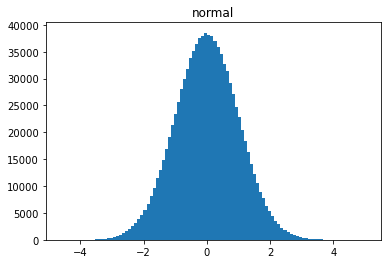

Distibución: NORMAL
mean: 0.00012613614639545598
std : 1.0001739974640171
skewness : -0.00047518975768249074
kurtosis : 0.00040378855442968486
VaR 95% : -1.6435936330024359
CVaR 95% : -2.06330963196147
Jarque-Bera : 0.04442776749640798
p_value : 0.9780310277369132
is normal :True


In [44]:
# !/usr/bin/ python
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import scipy
import importlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import skew, kurtosis, chi2


def normality_test(x_size, type_random_variable, degrees_freedom=5):
    """Create a normality test by example with Jarque_Bera
    Arg:
        1. x_size : size of distribution.
        2. type_random_variable : generate random distributions.
        3. degrees_freedom : only for t-student
    Return:
        Plot and risk metrics
    """
    if type_random_variable == "normal":
        x = np.random.standard_normal(x_size)
        x_str = type_random_variable
    elif type_random_variable == "exponential":
        x = np.random.standard_exponential(x_size)
        x_str = type_random_variable
    elif type_random_variable == "student":
        x = np.random.standard_t(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"
    elif type_random_variable == "chi-squared":
        x = np.random.chisquare(size=x_size, df=degrees_freedom)
        x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"

    # compute risk metrics
    x_mean = np.mean(x)
    x_stdev = np.std(x)
    x_skew = skew(x)
    x_kurt = kurtosis(x)
    x_var_95 = np.percentile(x, 5)
    x_cvar_95 = np.mean(x[x <= x_var_95])
    jb = x_size/6 * (x_skew**2 + 1/4*(x_kurt**2))
    p_value = 1 - chi2.cdf(jb, df=2) # buscamos dos grados de libertad
    is_normal = (p_value > 0.05) # equivalenty jb < 6

    # plot histogram
    plt.figure()
    plt.hist(x, bins=100)
    plt.title(type_random_variable)
    plt.show()

    # print risk metrics
    print("Distibución: " + x_str.upper())
    print("mean: " + str(x_mean))
    print("std : " + str(x_stdev))
    print("skewness : " + str(x_skew))
    print("kurtosis : " + str(x_kurt))
    print("VaR 95% : " + str(x_var_95))
    print("CVaR 95% : " + str(x_cvar_95))
    print("Jarque-Bera : " + str(jb))
    print("p_value : " + str(p_value))
    print("is normal :" + str(is_normal))


if __name__ == "__main__":

    normality_test(10**6, "normal")

Mi valor en riesgo es de VaR 95% : -1.6435936330024359 pero cuando toma el promedio de los valores que están a la izquierda de dicho valor es CVaR 95% : -2.06330963196147

**CUÁL ES EL PUNTO DE TODO ESTE ANALISIS DE MÉTRICAS DE RIESGO**

¿Qué quiero entender cuando veo una distribución de ganacias y pérdidas, o rendimientos? Yo quiero saber:
* la media
* la volatilidad (que en los mercados con es la desviación standard)
* skewness quiero ver qué tan simétrica es
* kurtosis : quiero ver qué tantas colas largas tiene
* quiero calcular el valor en rieso
* y el valor en riesgo condicional
* si la variable va a ser normal o no

Vamos a ver en loop qué pasa con CVaR cuando no hay normalidad: 

In [50]:
def normality_test(x_size, type_random_variable, degrees_freedom=5):
    """Create a normality test e.g Jarque_bera
    Arg:
        1. x_size : size of distribution.
        2. type_random_variable : generate random distributions.
        3. degrees_freedom : only for t-student
    Return:
    """

    is_normal = True
    counter = 0
    while is_normal:
        
        if type_random_variable == "normal":
            x = np.random.standard_normal(x_size)
            x_str = type_random_variable
        elif type_random_variable == "exponential":
            x = np.random.standard_exponential(x_size)
            x_str = type_random_variable
        elif type_random_variable == "student":
            x = np.random.standard_t(size=x_size, df=degrees_freedom)
            x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"
        elif type_random_variable == "chi-squared":
            x = np.random.chisquare(size=x_size, df=degrees_freedom)
            x_str = type_random_variable + "(df=" + str(degrees_freedom) + ")"

        # compute risk metrics
        x_mean = np.mean(x)
        x_stdev = np.std(x)
        x_skew = skew(x)
        x_kurt = kurtosis(x)
        x_var_95 = np.percentile(x, 5)
        x_cvar_95 = np.mean(x[x <= x_var_95])
        jb = x_size/6 * (x_skew**2 + 1/4*(x_kurt**2))
        p_value = 1 - chi2.cdf(jb, df=2) # buscamos dos grados de libertad
        is_normal = (p_value > 0.05) # equivalenty jb < 6

        # plot histogram
        plt.figure()
        plt.hist(x, bins=100)
        plt.title(type_random_variable)
        plt.show()
        
        print("counter :" + str(counter))
        print("------------")

        # print risk metrics
        print("Distibución: " + x_str.upper())
        print("mean: " + str(x_mean))
        print("std : " + str(x_stdev))
        print("skewness : " + str(x_skew))
        print("kurtosis : " + str(x_kurt))
        print("VaR 95% : " + str(x_var_95))
        print("CVaR 95% : " + str(x_cvar_95))
        print("Jarque-Bera : " + str(jb))
        print("p_value : " + str(p_value))
        print("is normal :" + str(is_normal))
        
        counter += 1

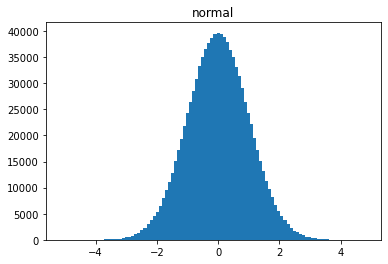

counter :0
------------
Distibución: NORMAL
mean: -0.0007761472666232012
std : 1.0014703816369175
skewness : -0.0027160421902078214
kurtosis : 0.0060890909821664785
VaR 95% : -1.6476466021513245
CVaR 95% : -2.0692614655515356
Jarque-Bera : 2.7743570710440304
p_value : 0.24977905409122114
is normal :True


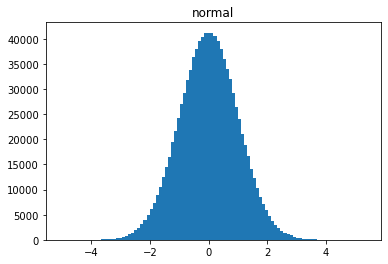

counter :1
------------
Distibución: NORMAL
mean: 0.0019282575397358325
std : 0.9994841237769209
skewness : 0.00025191704140457524
kurtosis : 0.004895830774046317
VaR 95% : -1.6442592426639142
CVaR 95% : -2.059900442017052
Jarque-Bera : 1.009291989629129
p_value : 0.6037192573502037
is normal :True


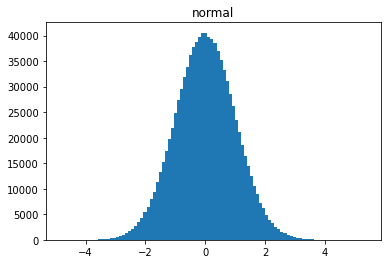

counter :2
------------
Distibución: NORMAL
mean: -0.0018287974749604348
std : 1.0009088963244779
skewness : 0.007171605991149454
kurtosis : -0.0015909633302415571
VaR 95% : -1.6448663446717744
CVaR 95% : -2.0613232221280415
Jarque-Bera : 8.677453928639013
p_value : 0.013053134737102678
is normal :False


In [51]:
normality_test(10**6, "normal")

> Vemoa que la variable aleatoria normal como distribución satisface lo mismo de antes:
> * VaR 95% : -1.6448663446717744
> * CVaR 95% : -2.0613232221280415
>
> pero los datos empíricos que estoy generando esto son tales que su  
Jarque-Bera(8.677453) $\nless$ 6 no pasa el test de normalidad
